In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD001.csv")


# Understanding the dataset

In [20]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (20631, 27)


In [18]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  -0.0007  -0.0004    100.0   518.67   641.82  1589.70   
1       1       2   0.0019  -0.0003    100.0   518.67   642.15  1591.82   
2       1       3  -0.0043   0.0003    100.0   518.67   642.35  1587.99   
3       1       4   0.0007   0.0000    100.0   518.67   642.35  1582.79   
4       1       5  -0.0019  -0.0002    100.0   518.67   642.37  1582.85   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [21]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [22]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            20631 non-null  int64  
 1   Cycles            20631 non-null  int64  
 2   Sensor1           20631 non-null  float64
 3   Sensor2           20631 non-null  float64
 4   Sensor3           20631 non-null  float64
 5   Sensor4           20631 non-null  float64
 6   Sensor5           20631 non-null  float64
 7   Sensor6           20631 non-null  float64
 8   Sensor7           20631 non-null  float64
 9   Sensor8           20631 non-null  float64
 10  Sensor9           20631 non-null  float64
 11  Sensor10          20631 non-null  float64
 12  Sensor11          20631 non-null  float64
 13  Sensor12          20631 non-null  float64
 14  Sensor13          20631 non-null  float64
 15  Sensor14          20631 non-null  float64
 16  Sensor15          20631 non-null  float6

In [23]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2  Sensor3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

        Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-

# Data visualization

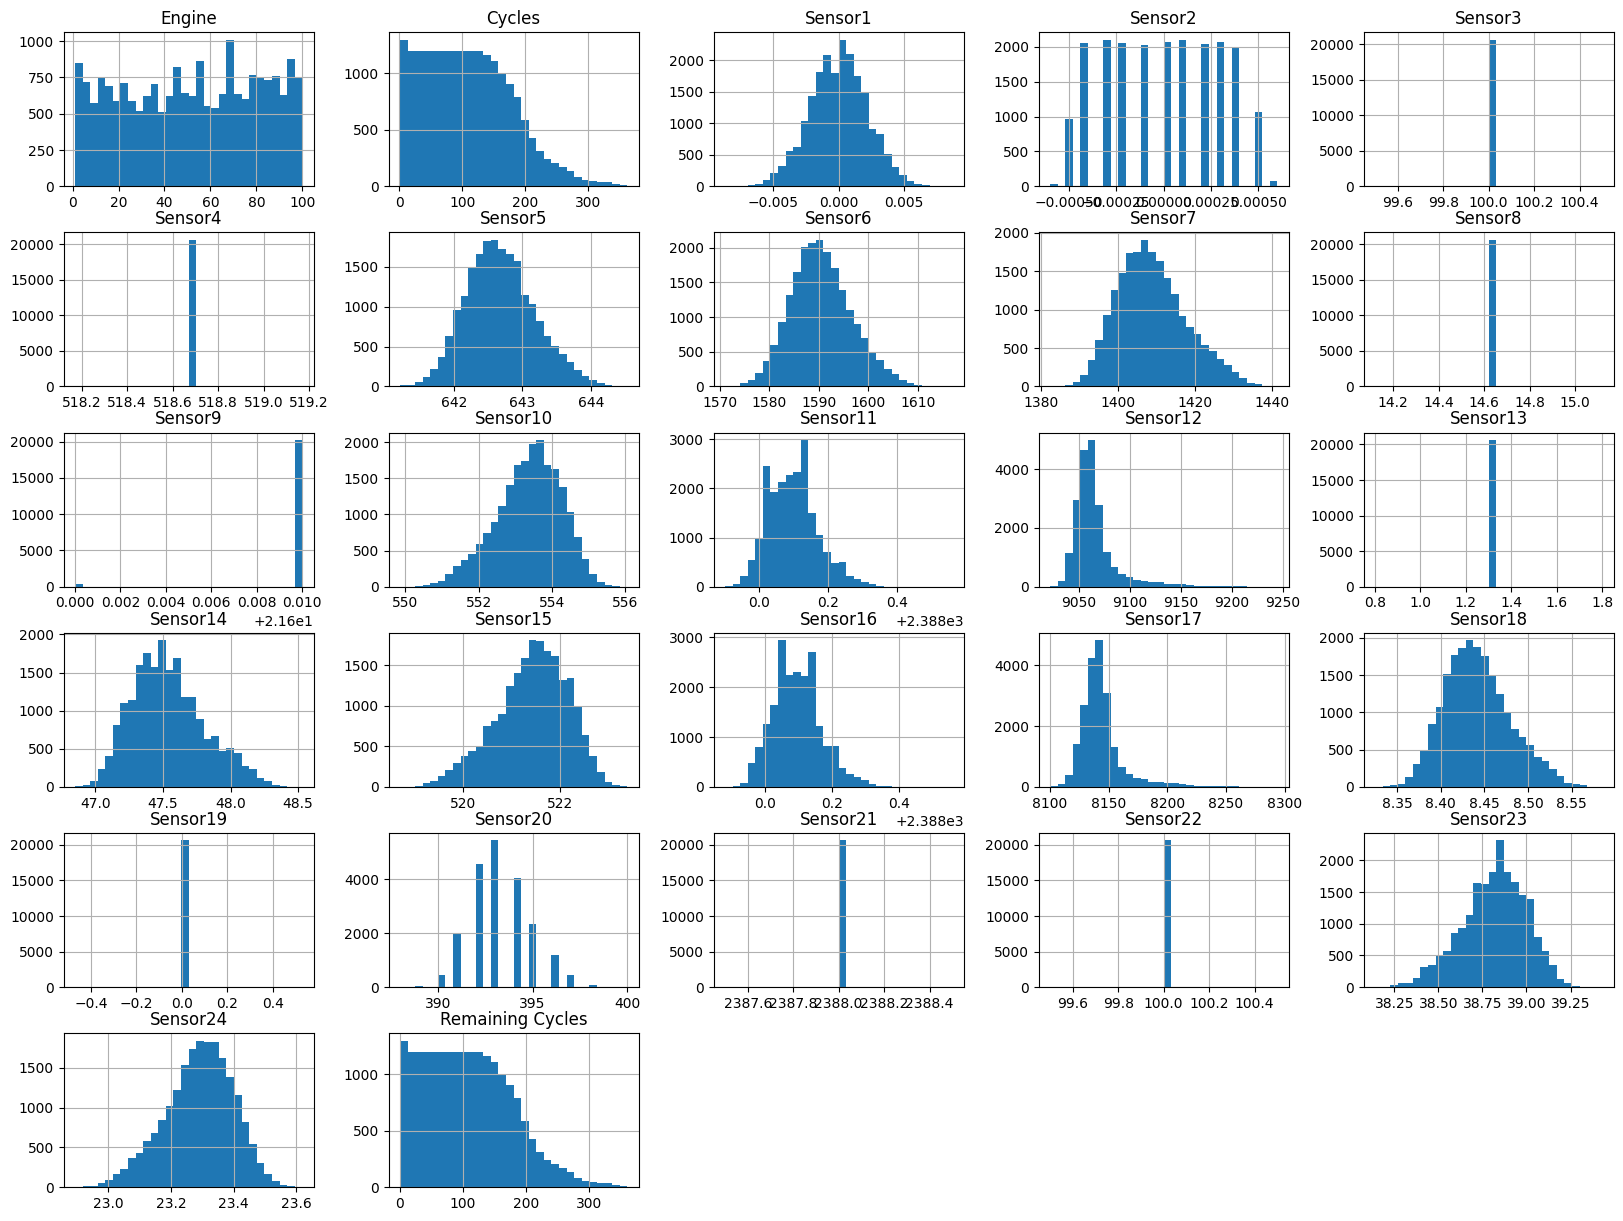

In [24]:
# Histograms

data.hist(bins=30, figsize=(20,15))
plt.show()

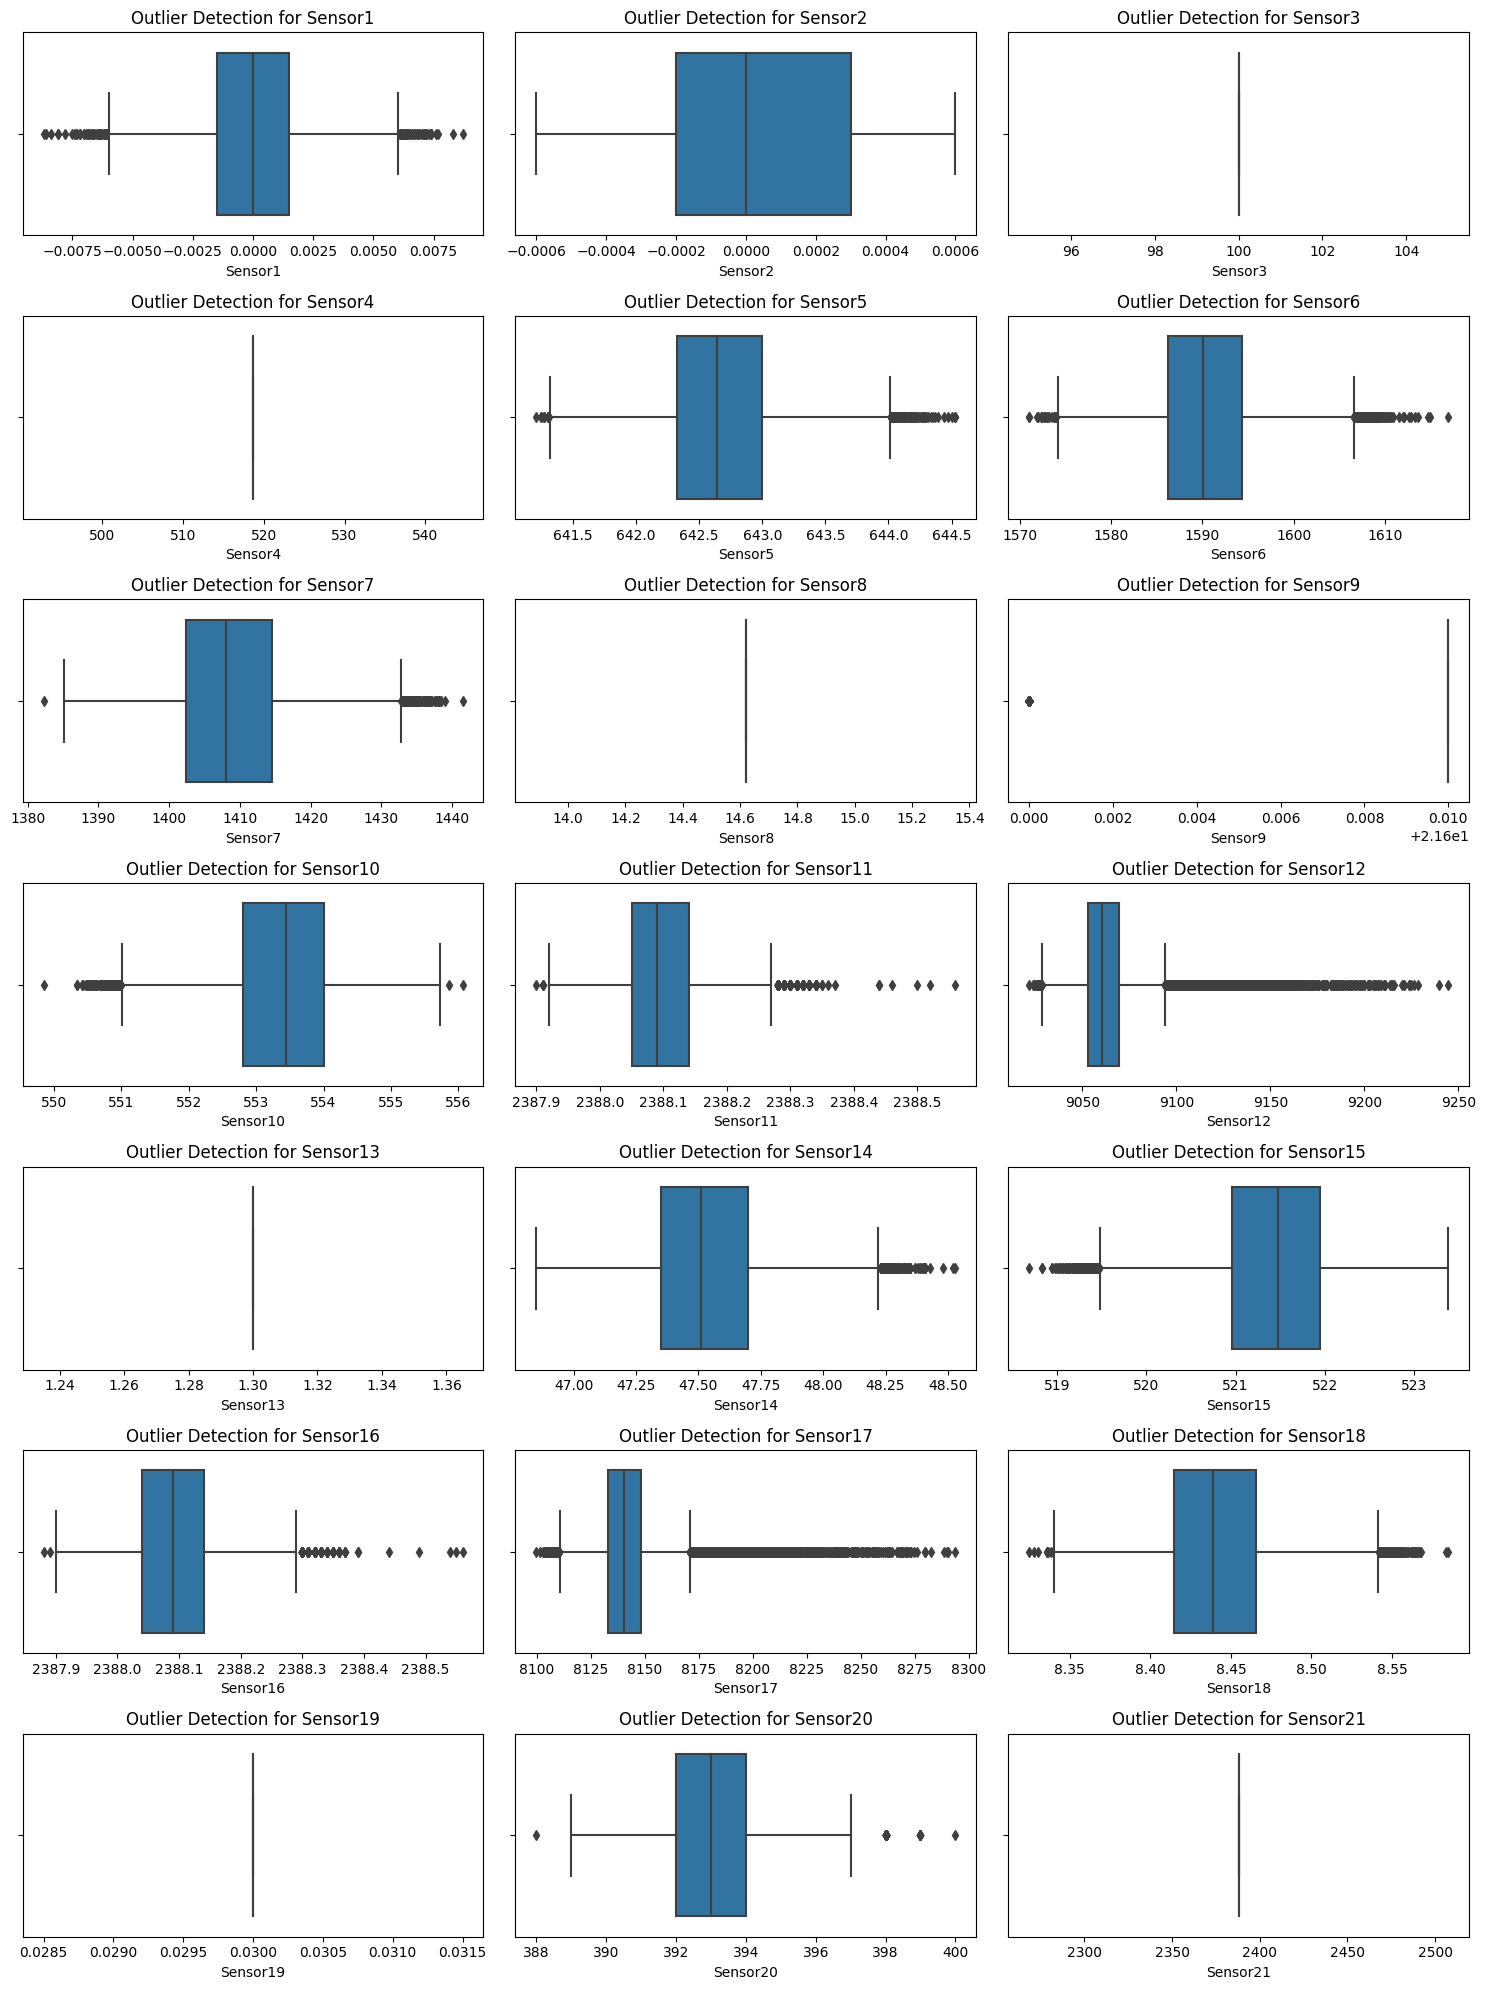

In [25]:
# Boxplots for outlier detection

fig, axs = plt.subplots(7, 3, figsize=(15, 20))
axs = axs.ravel()

for i, col in enumerate(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19', 'Sensor20', 'Sensor21']):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")

plt.tight_layout()
plt.show()

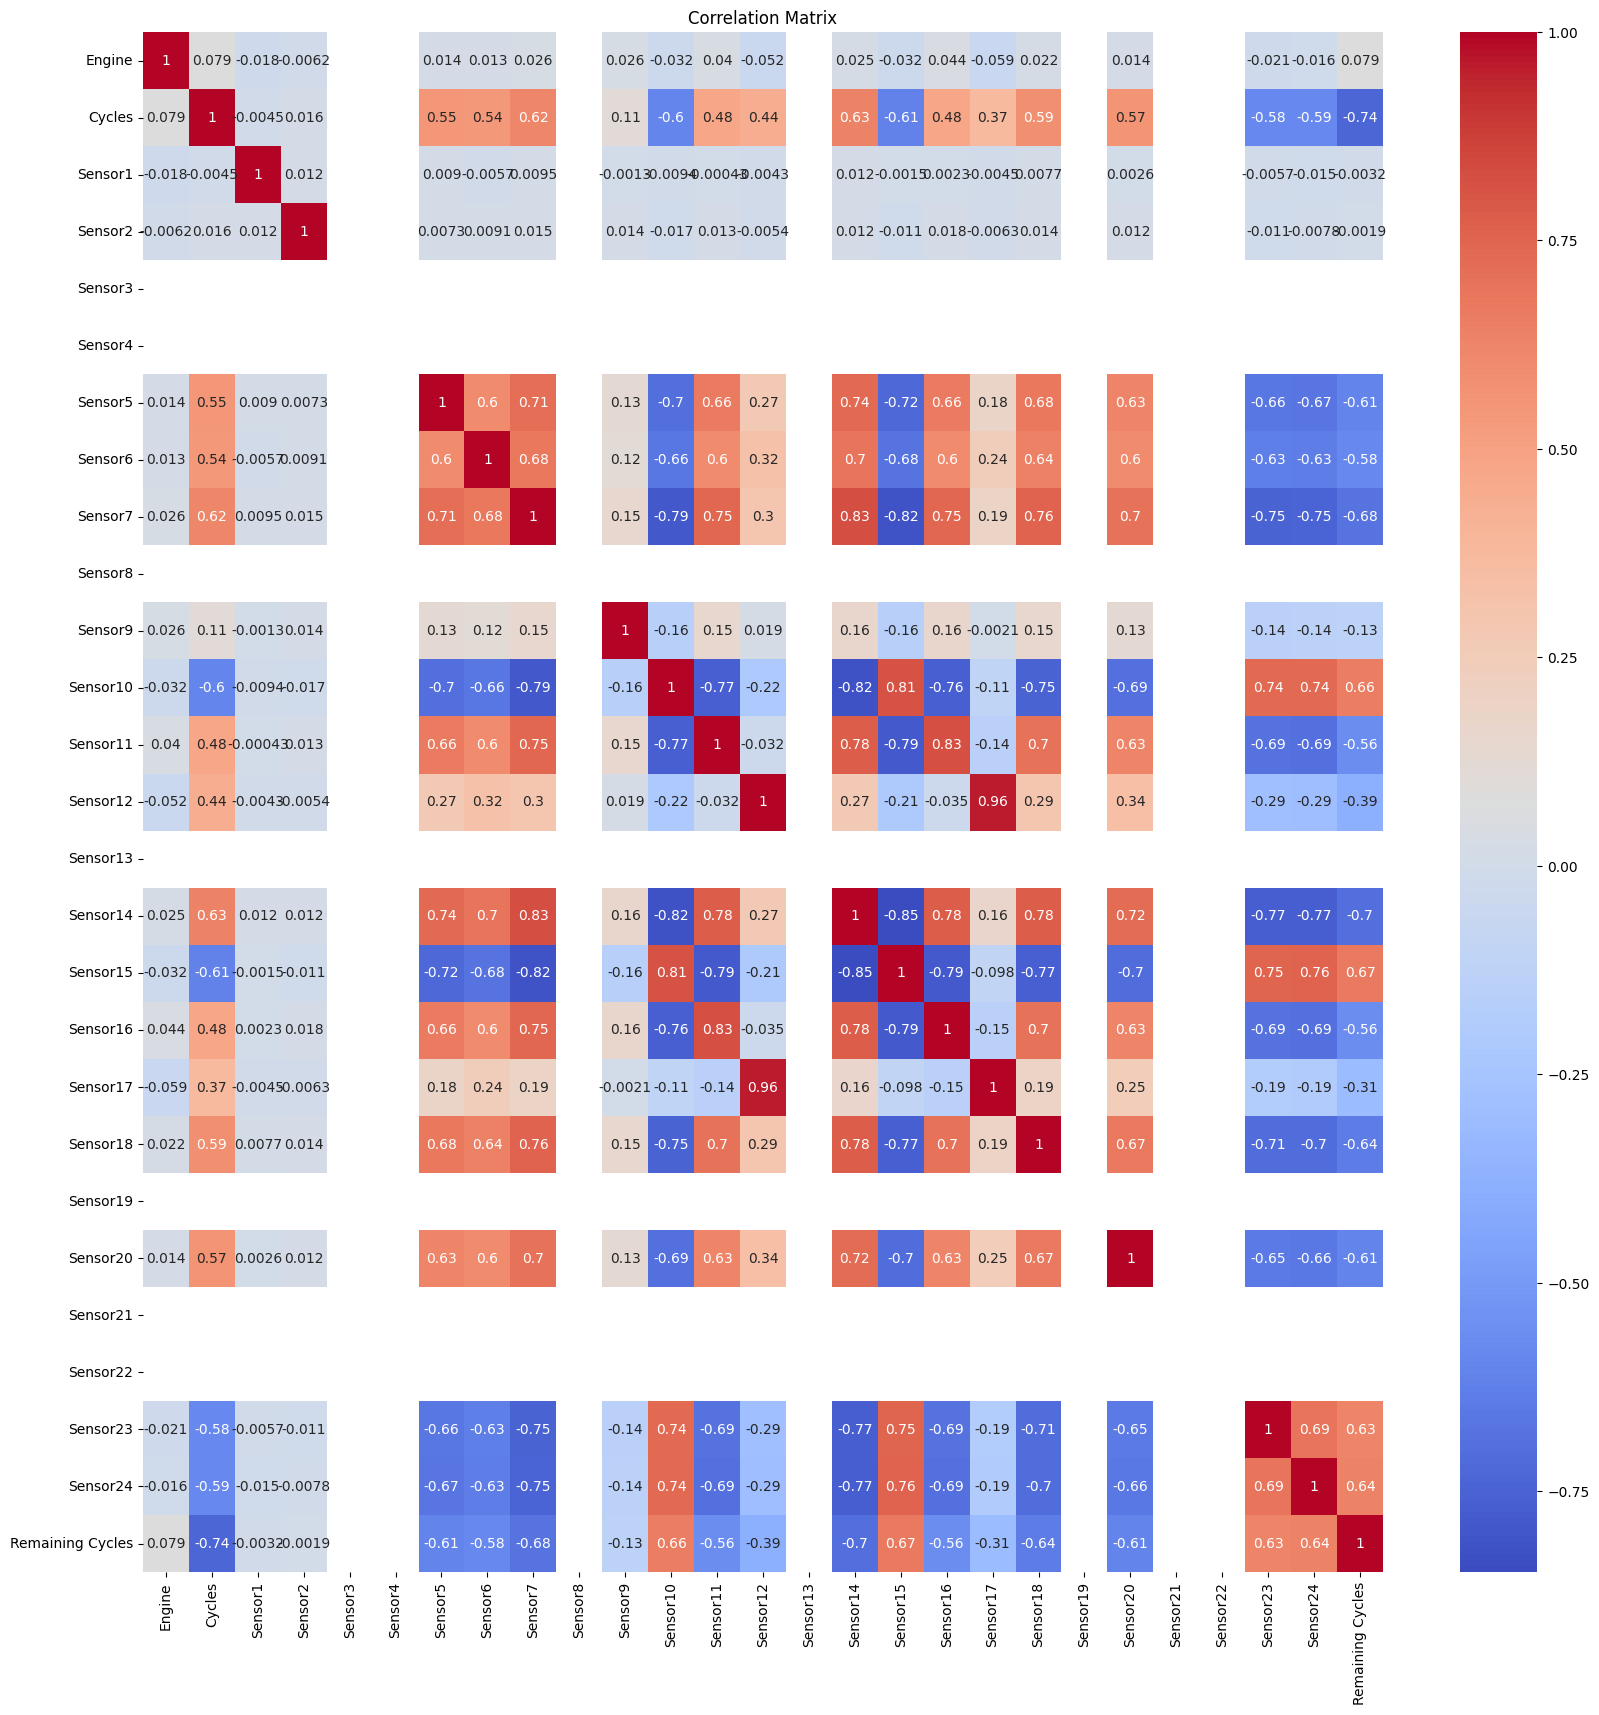

In [26]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

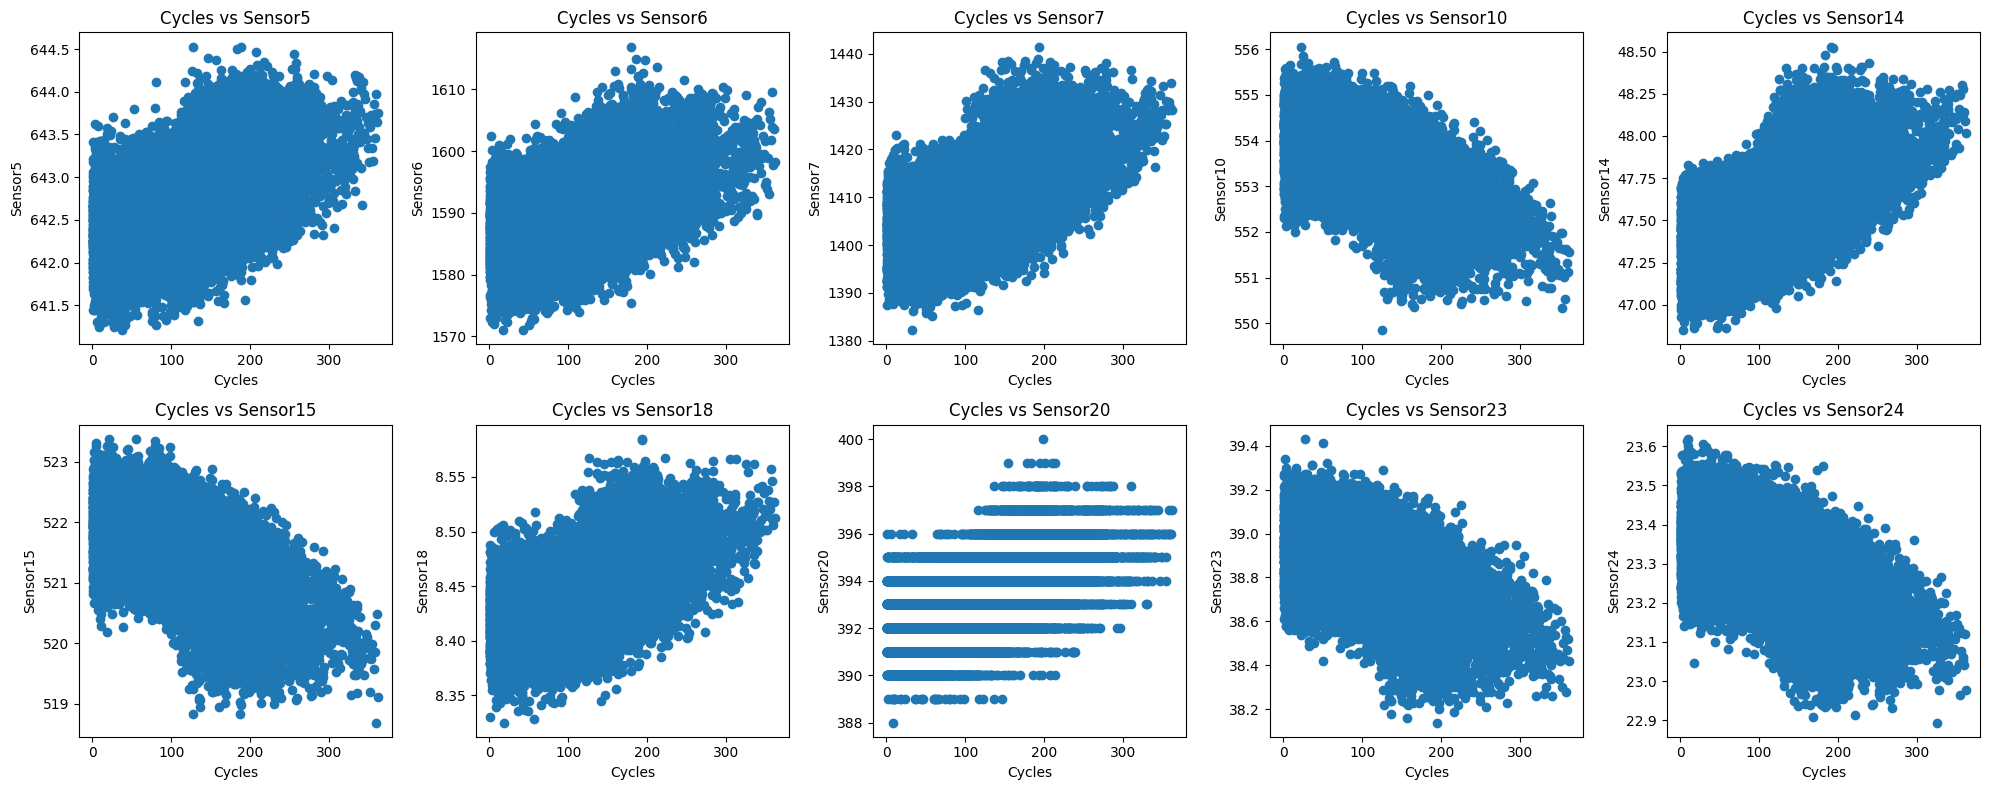

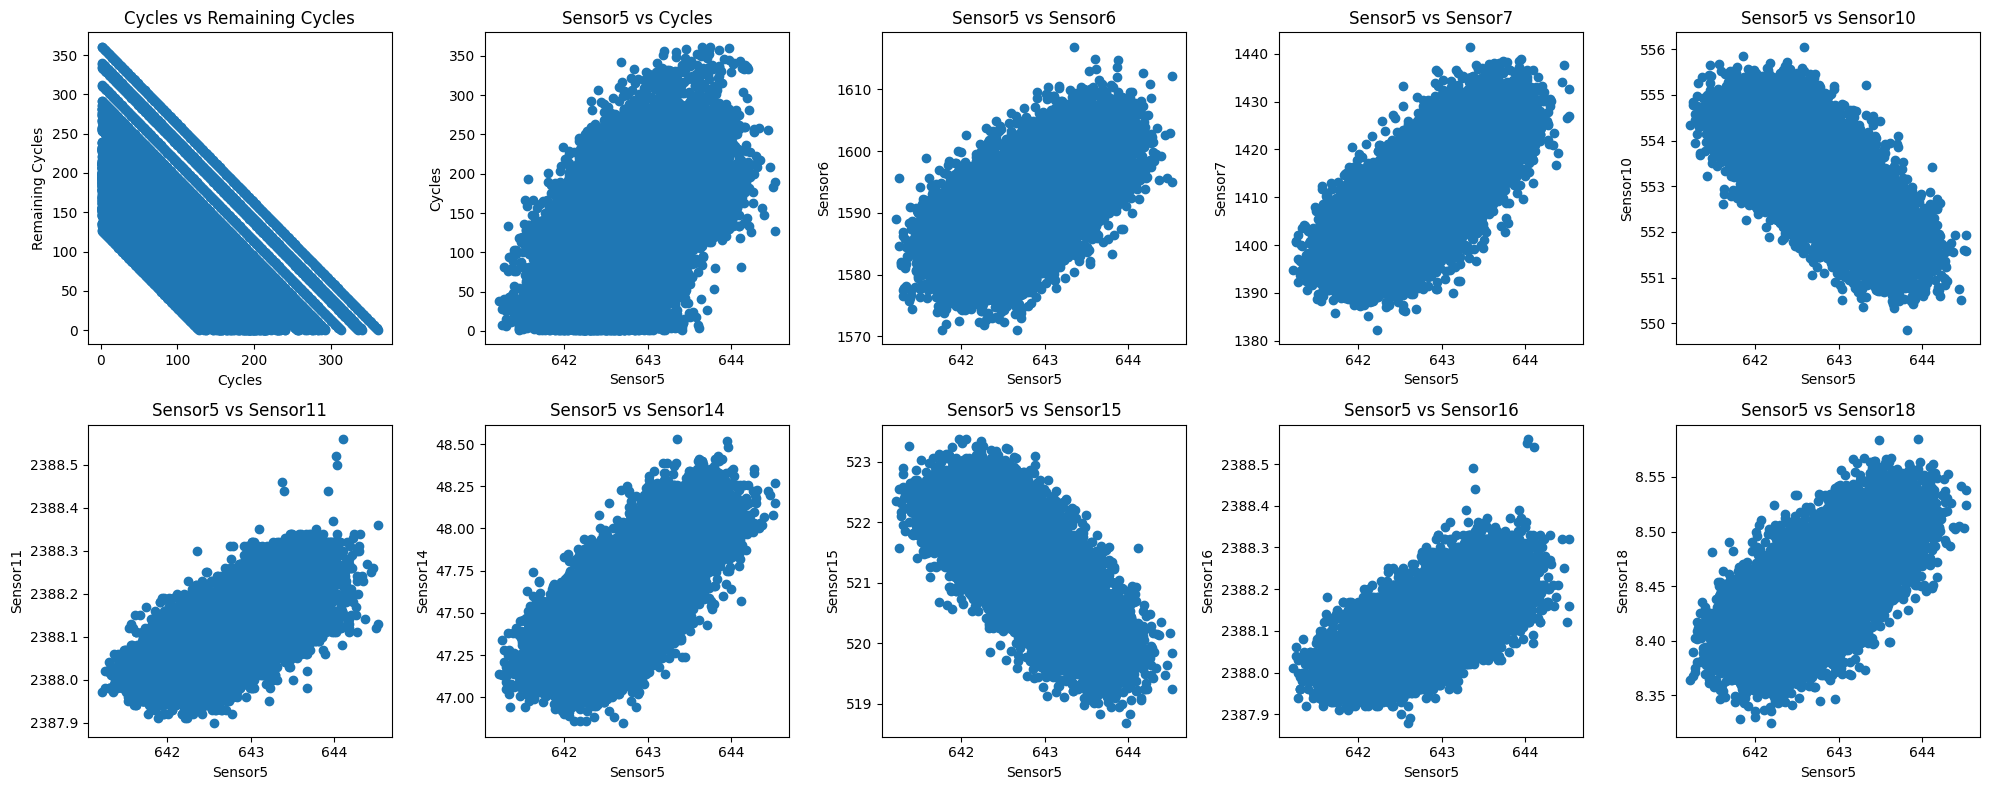

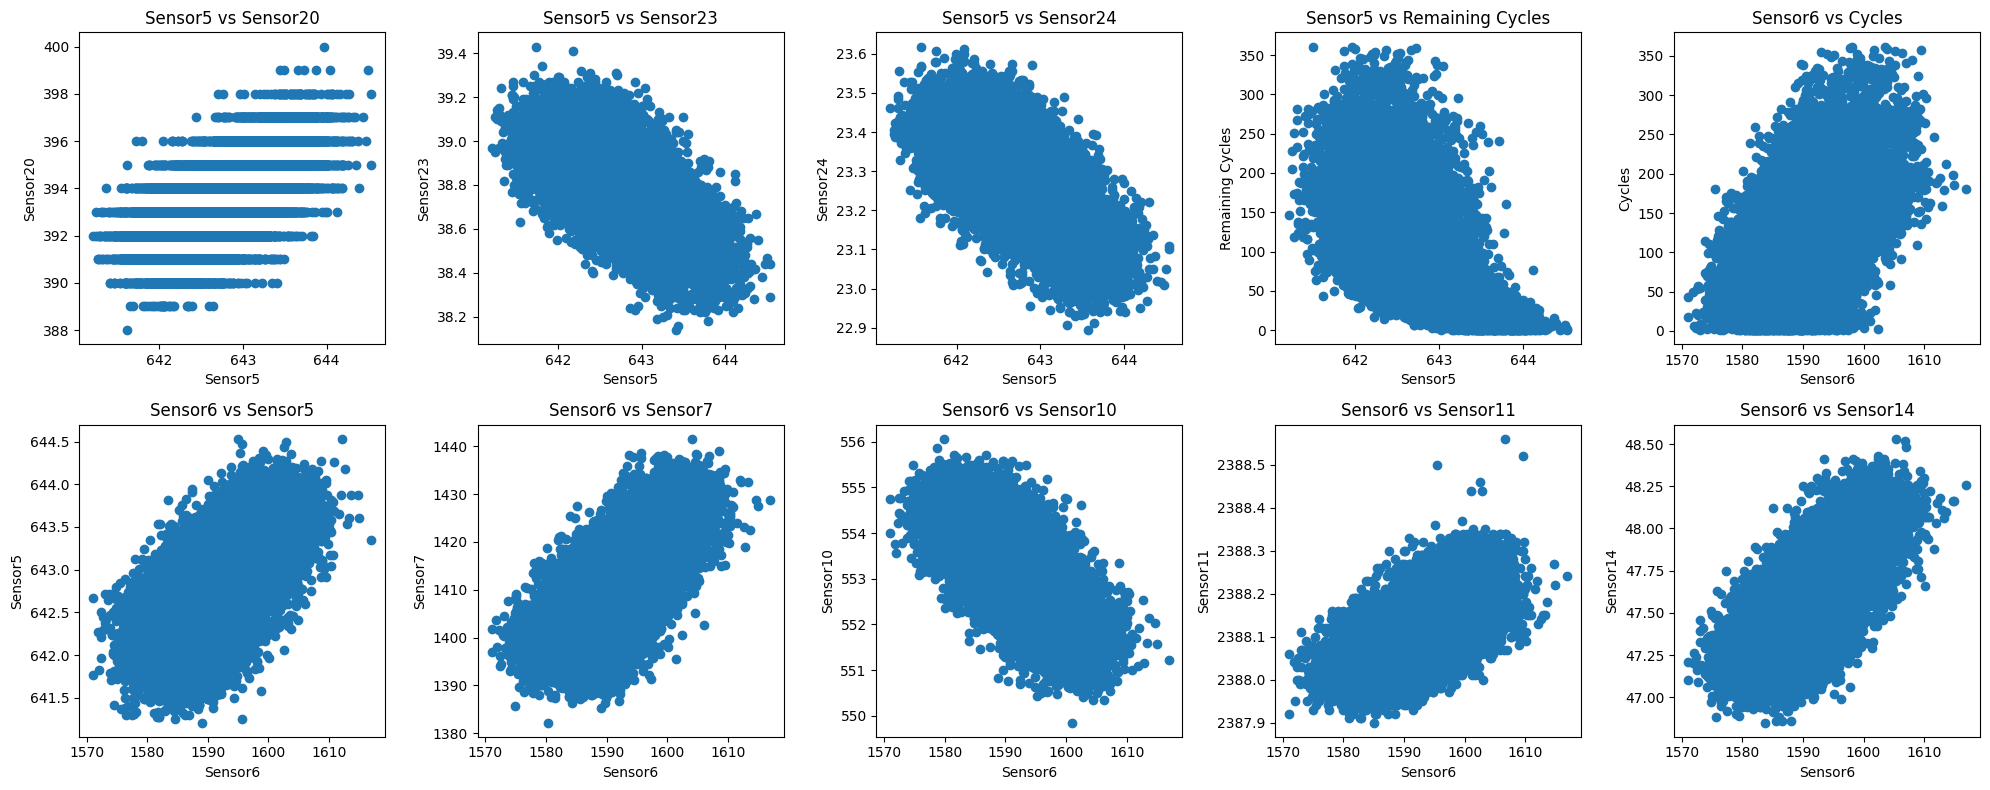

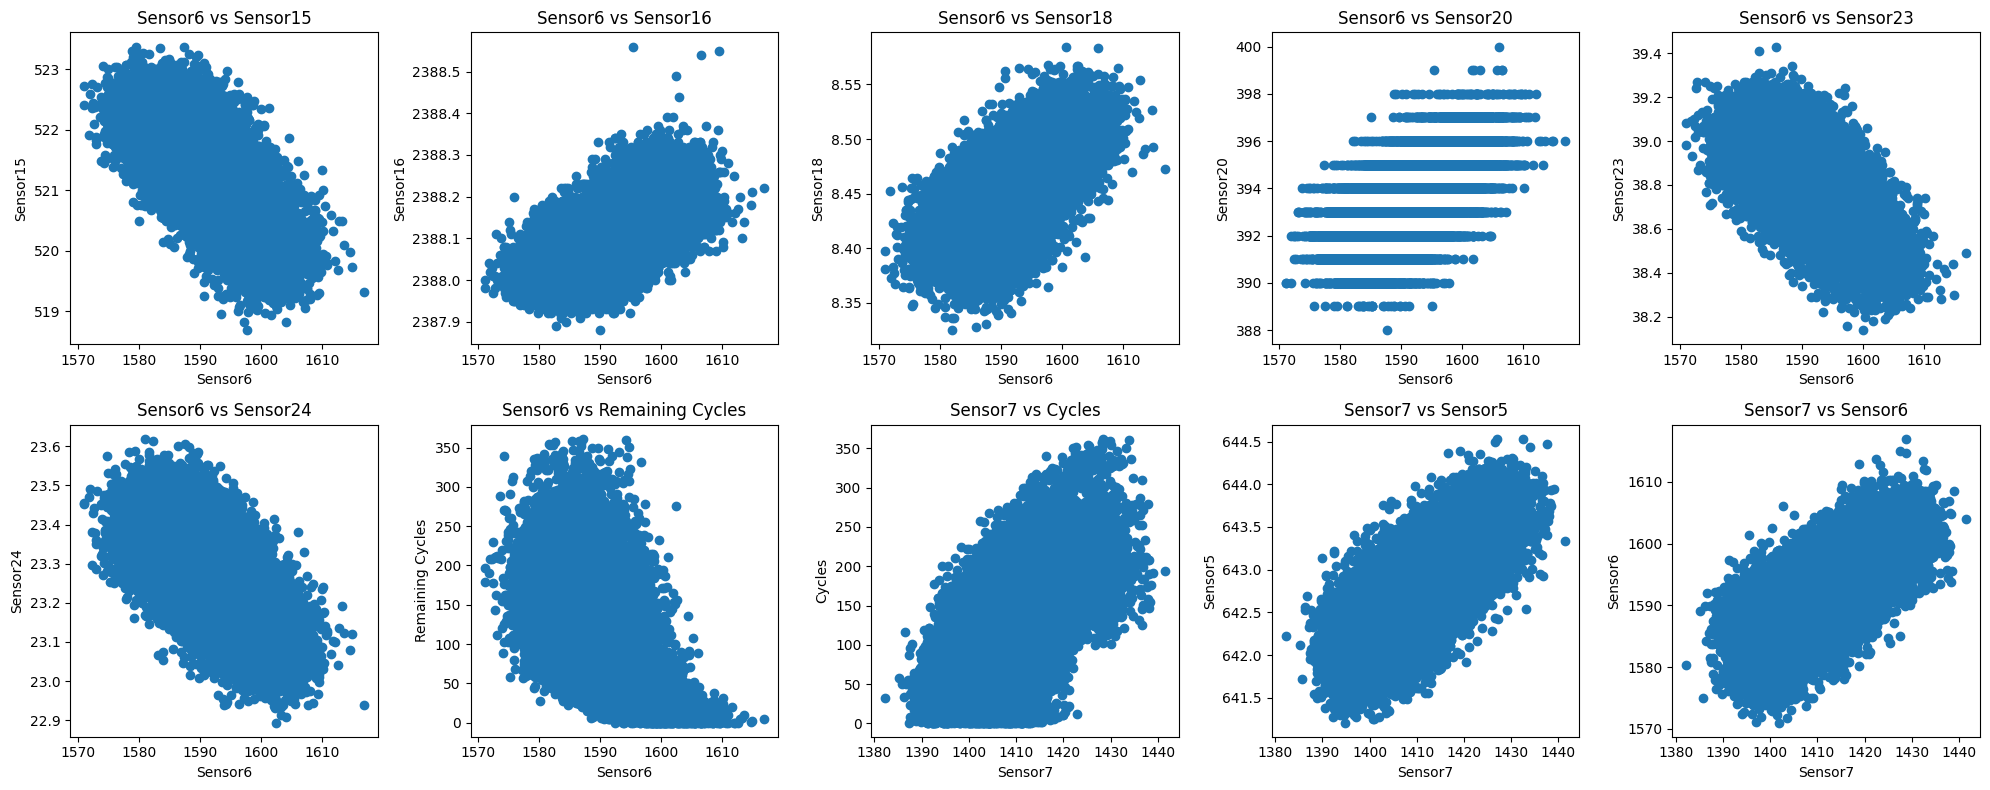

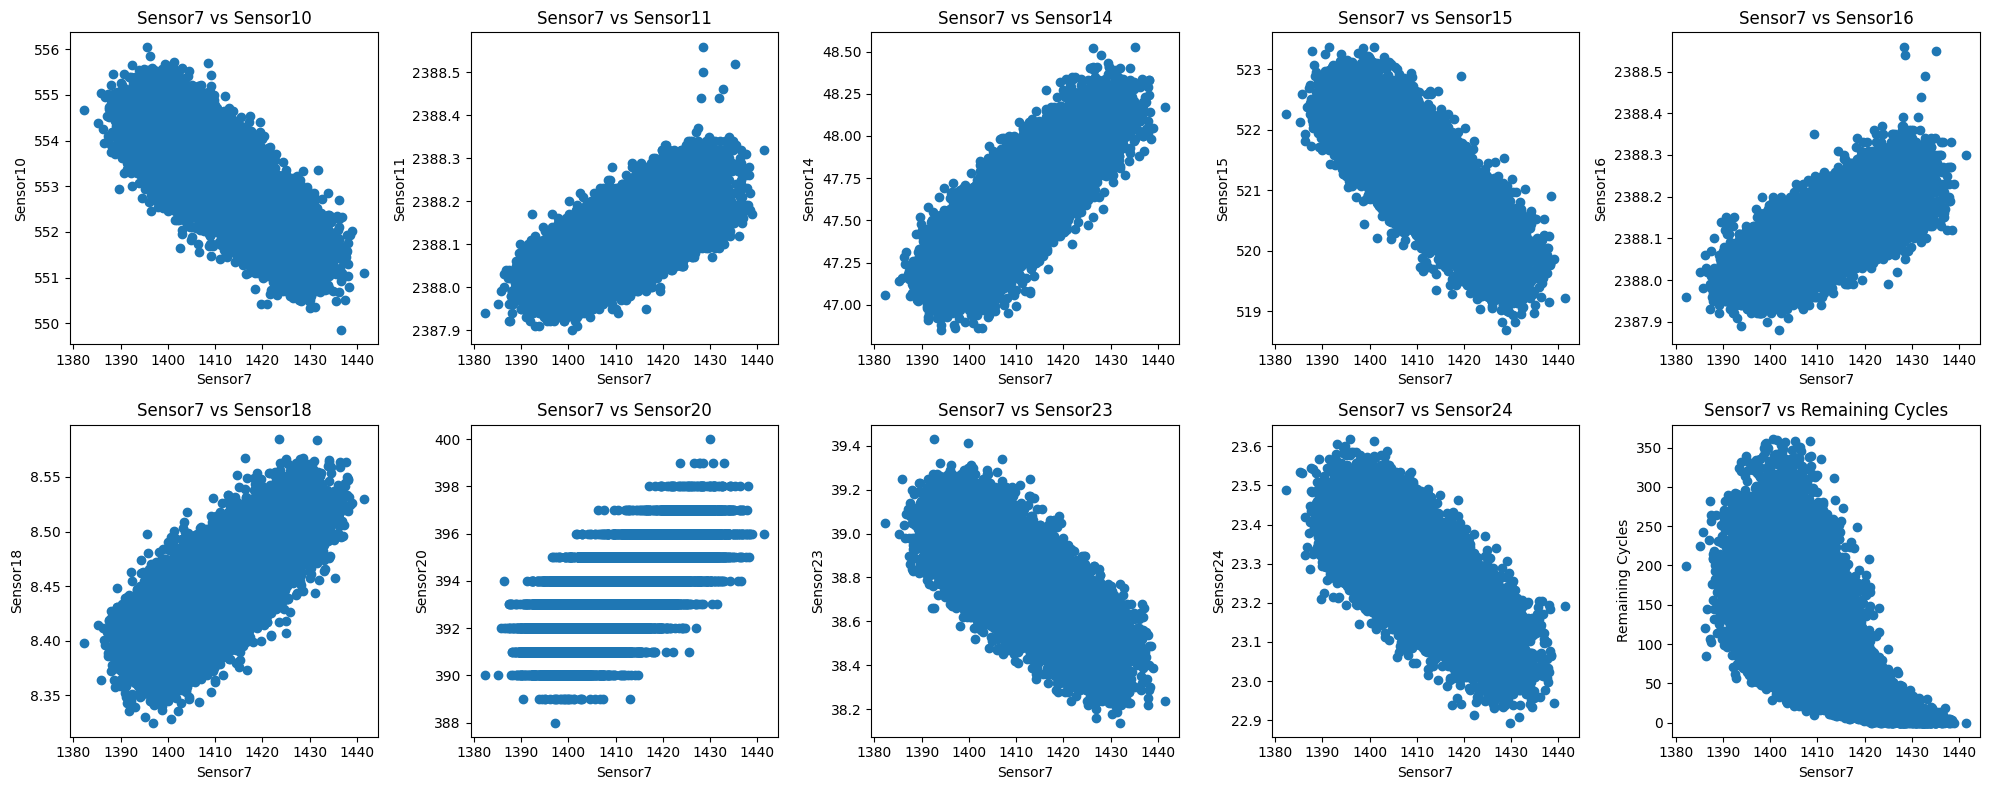

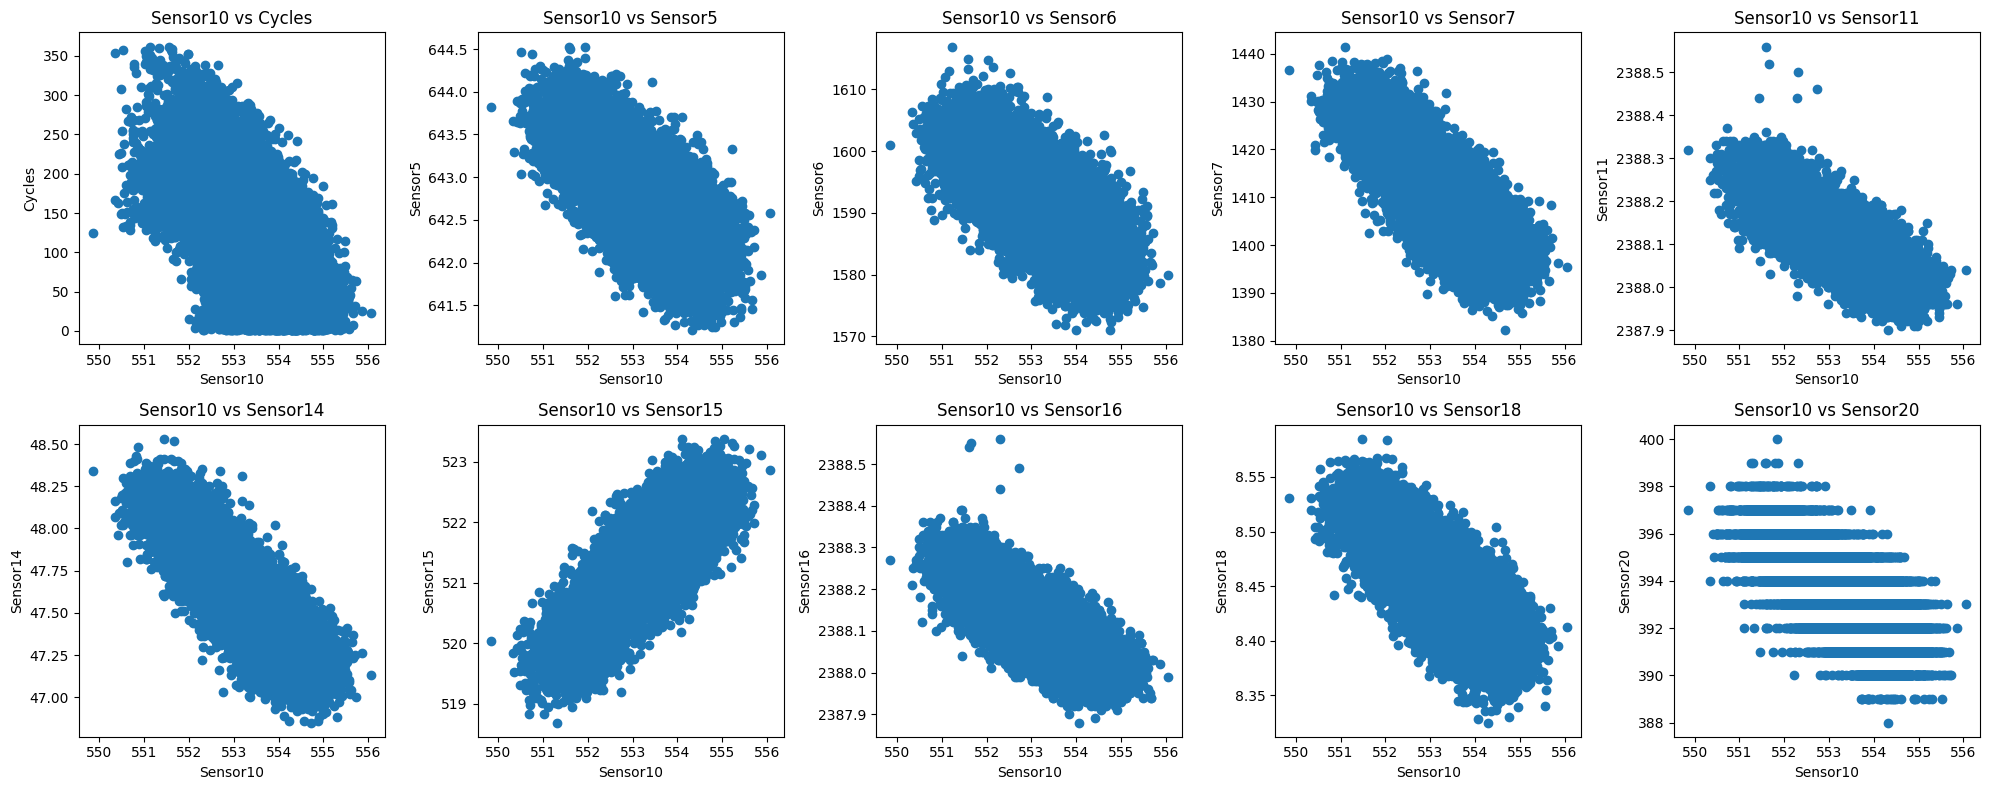

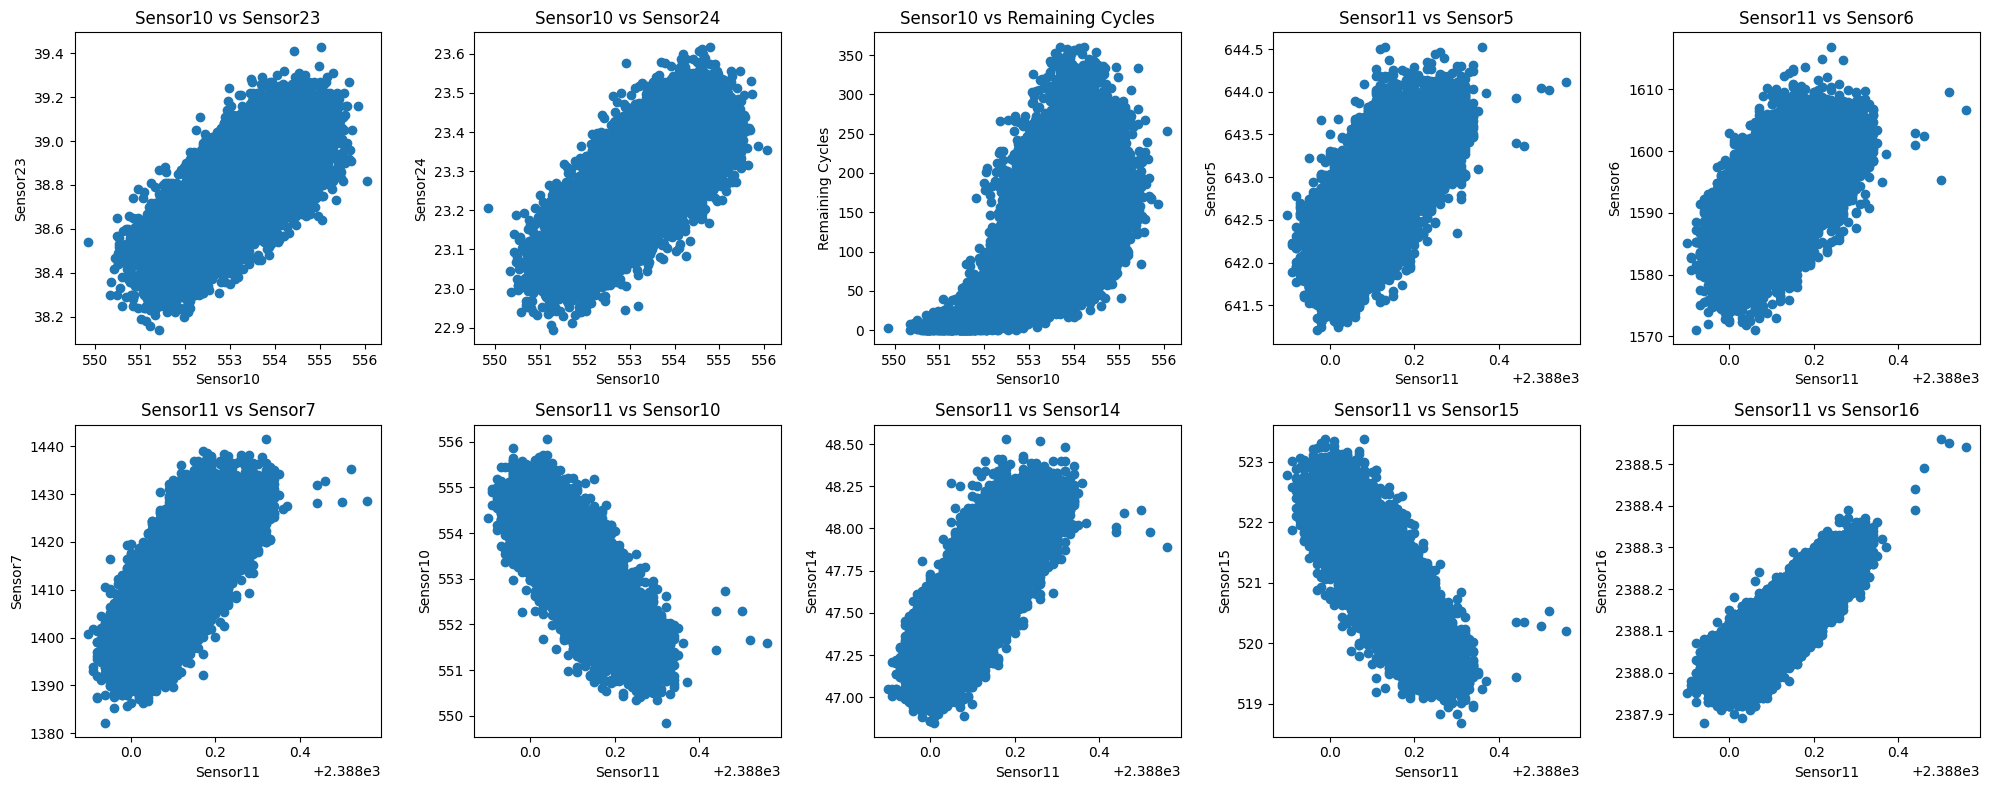

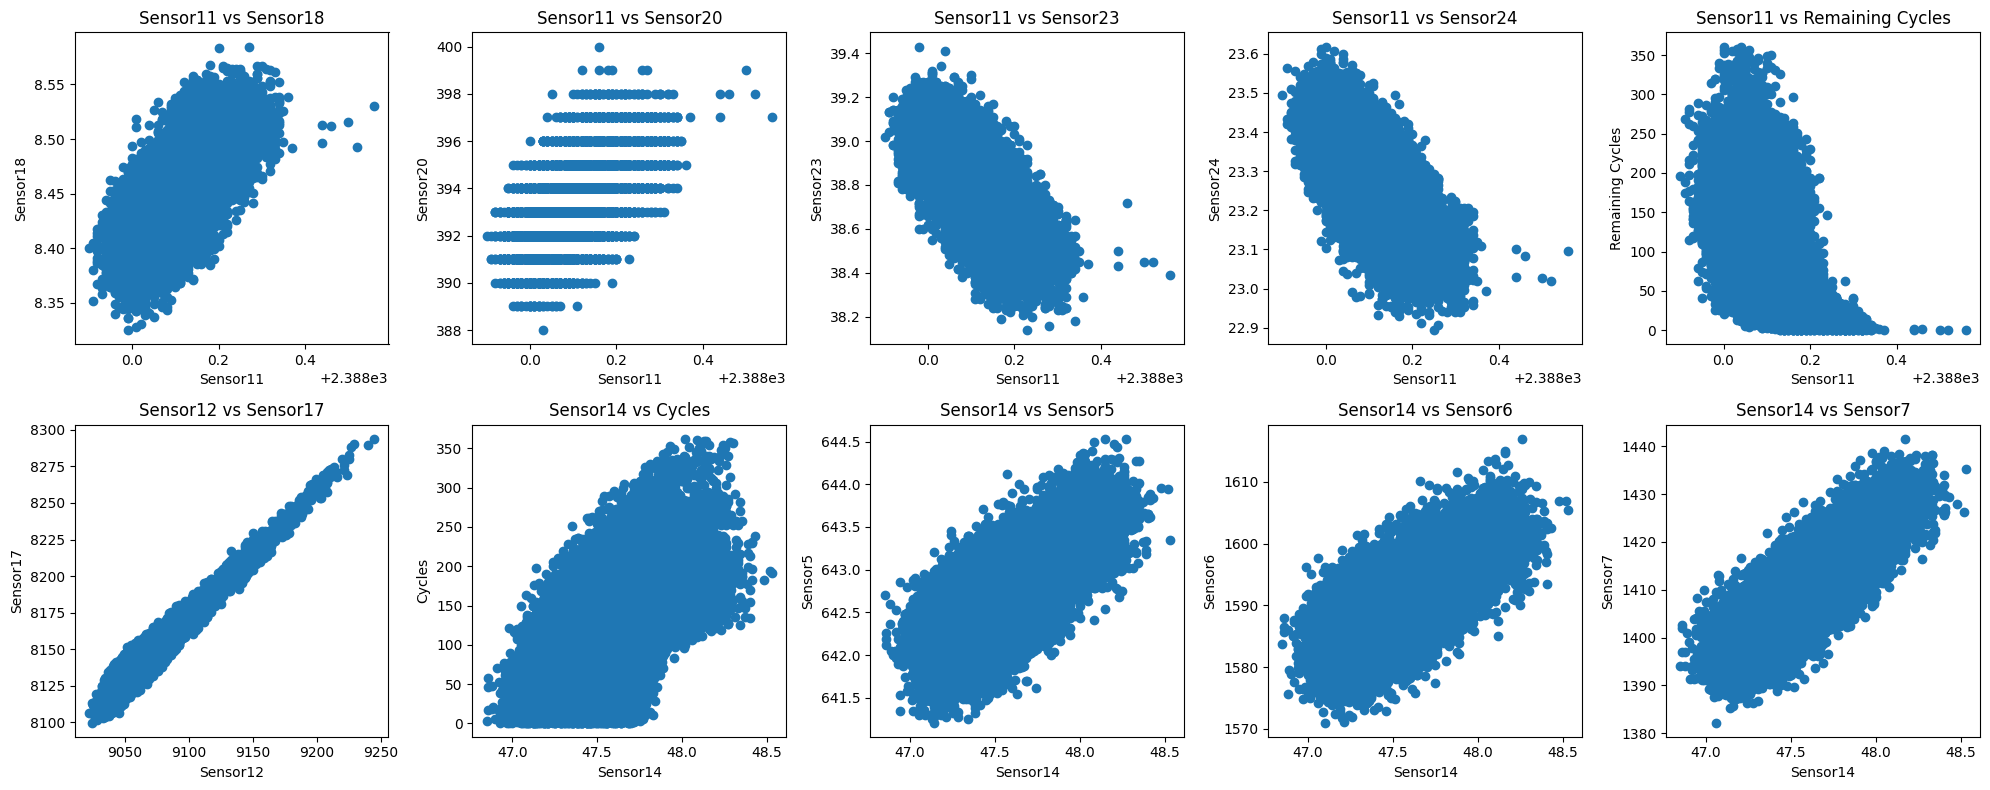

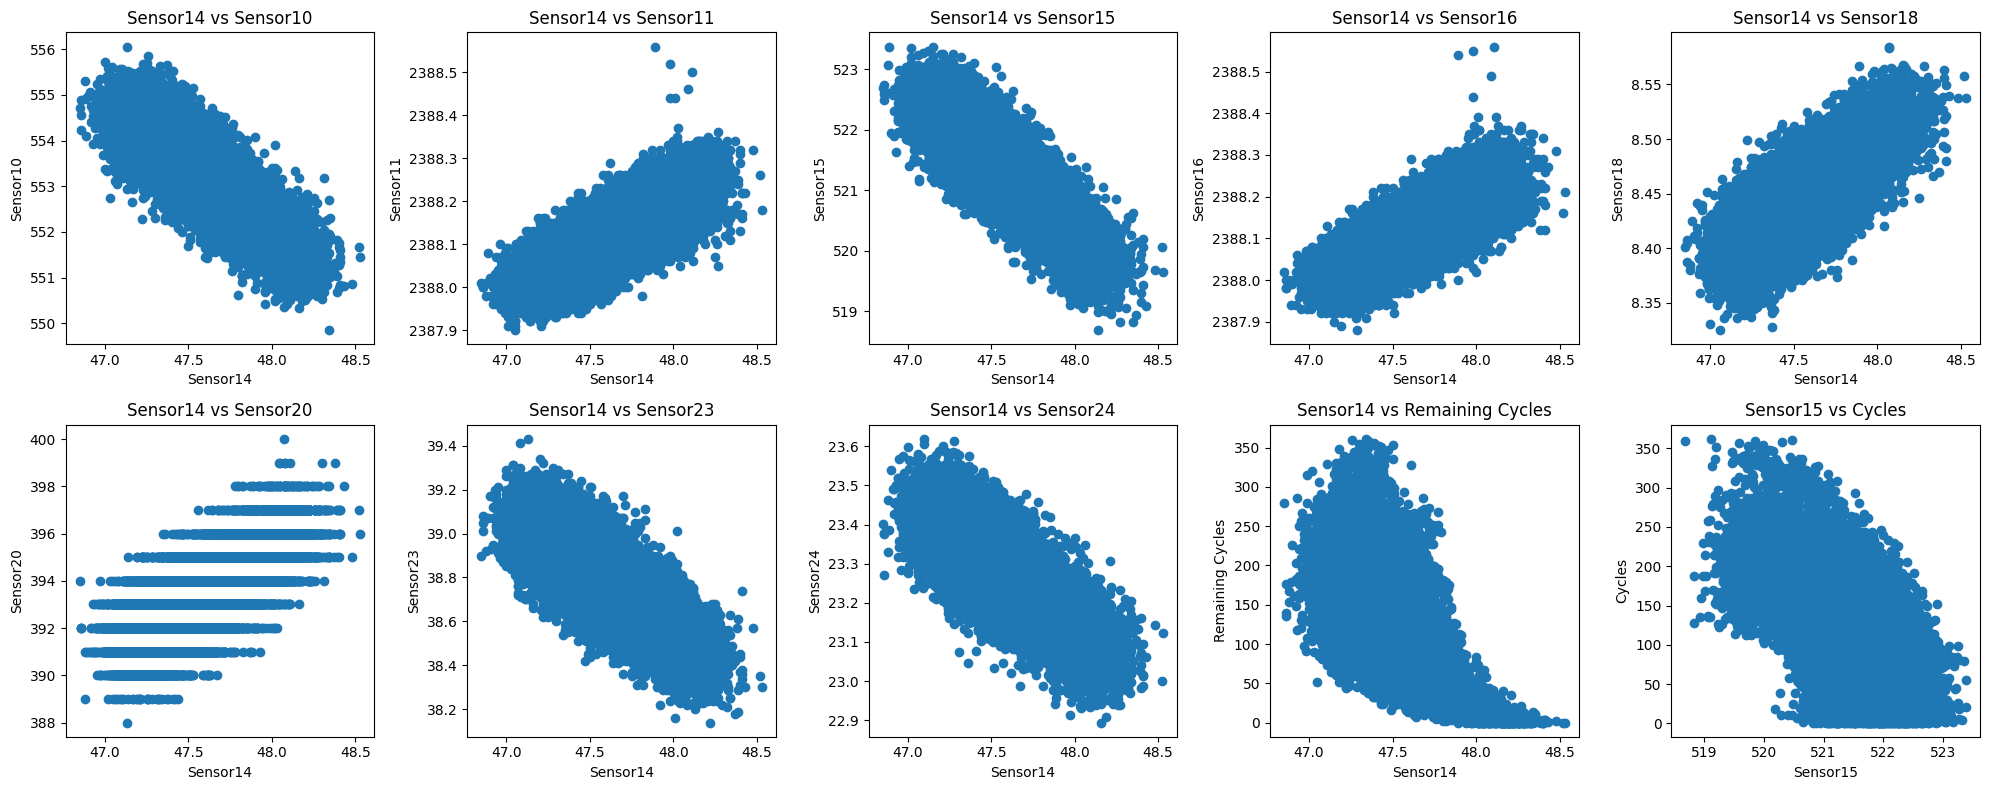

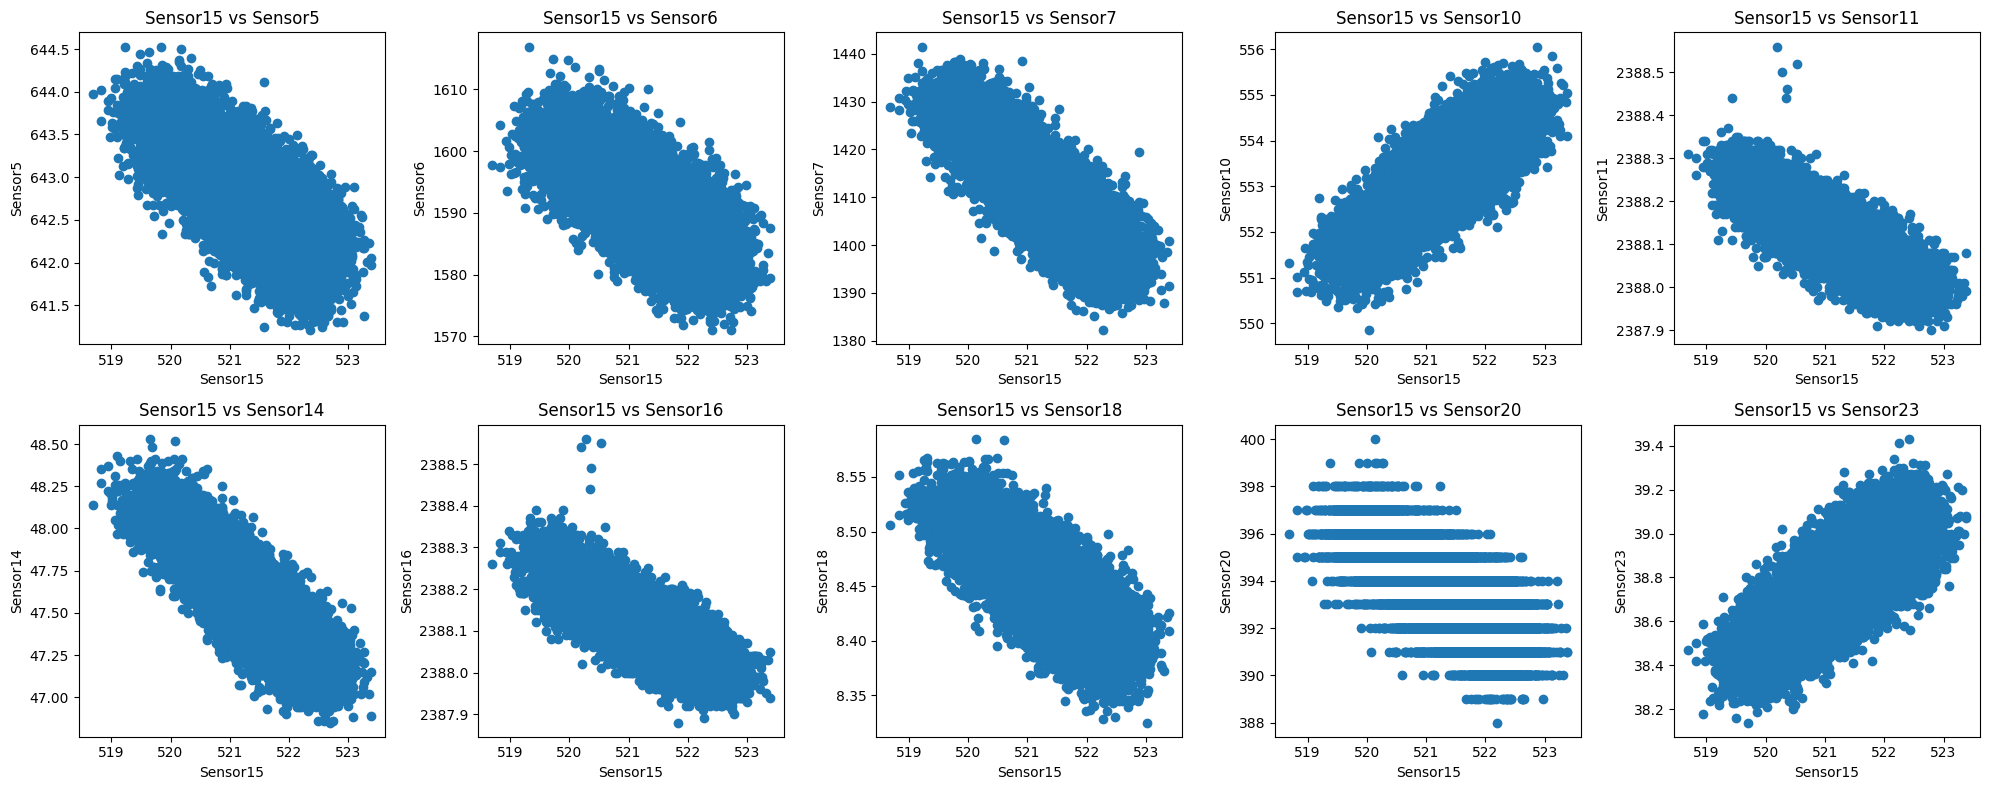

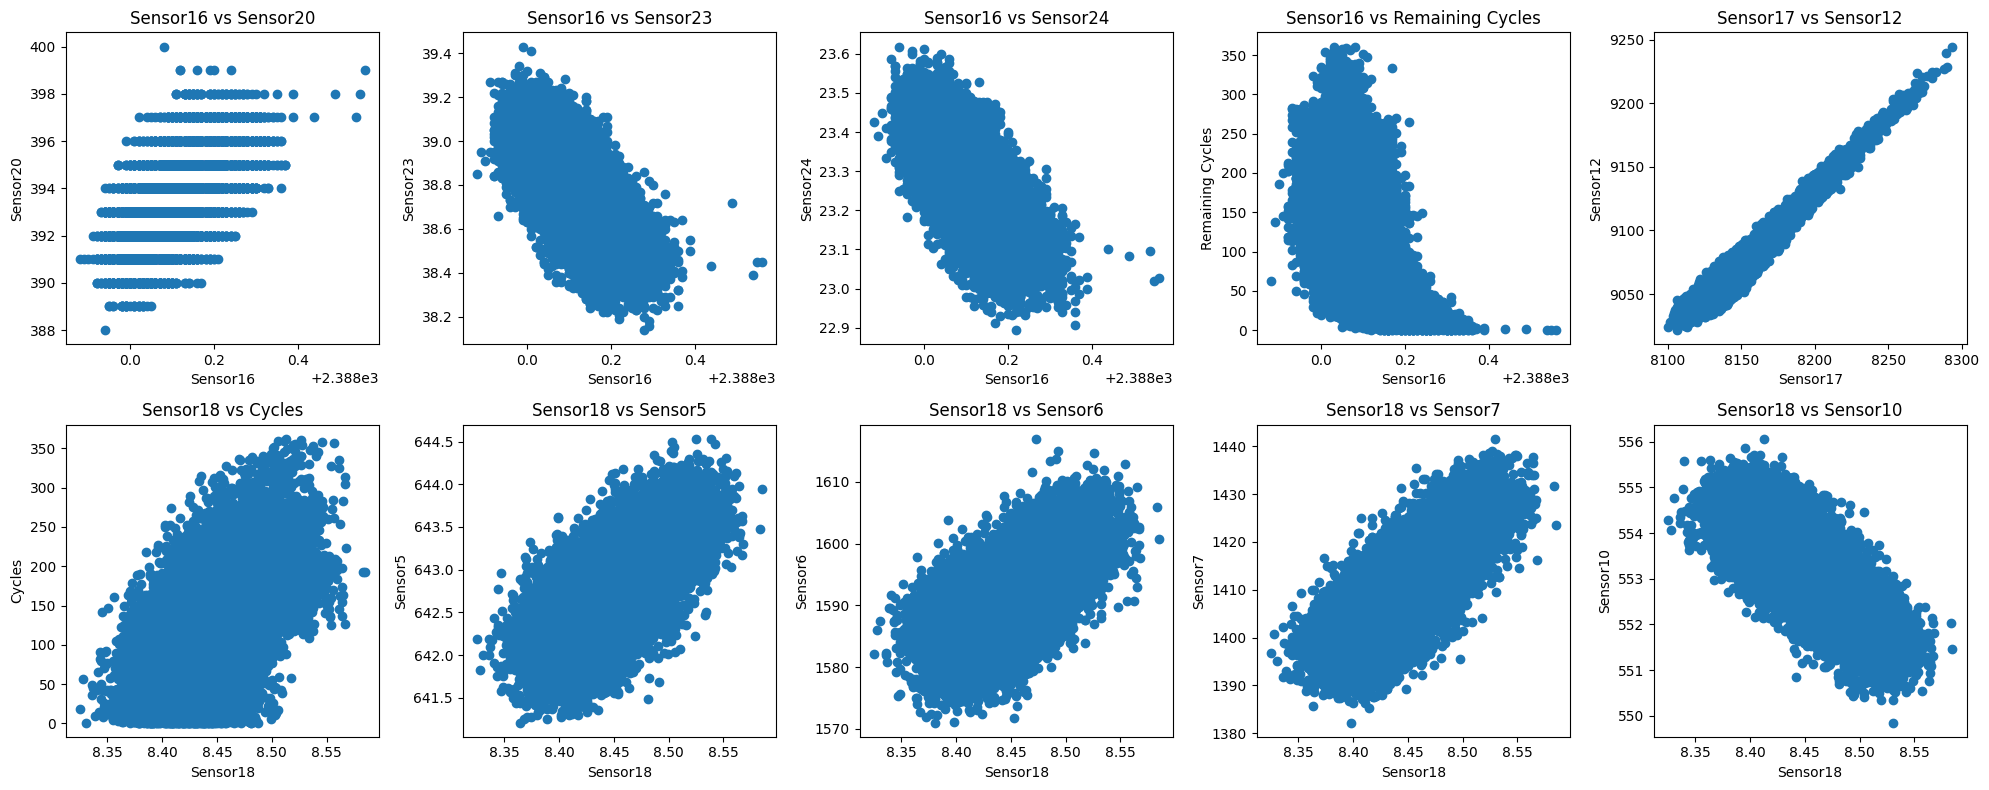

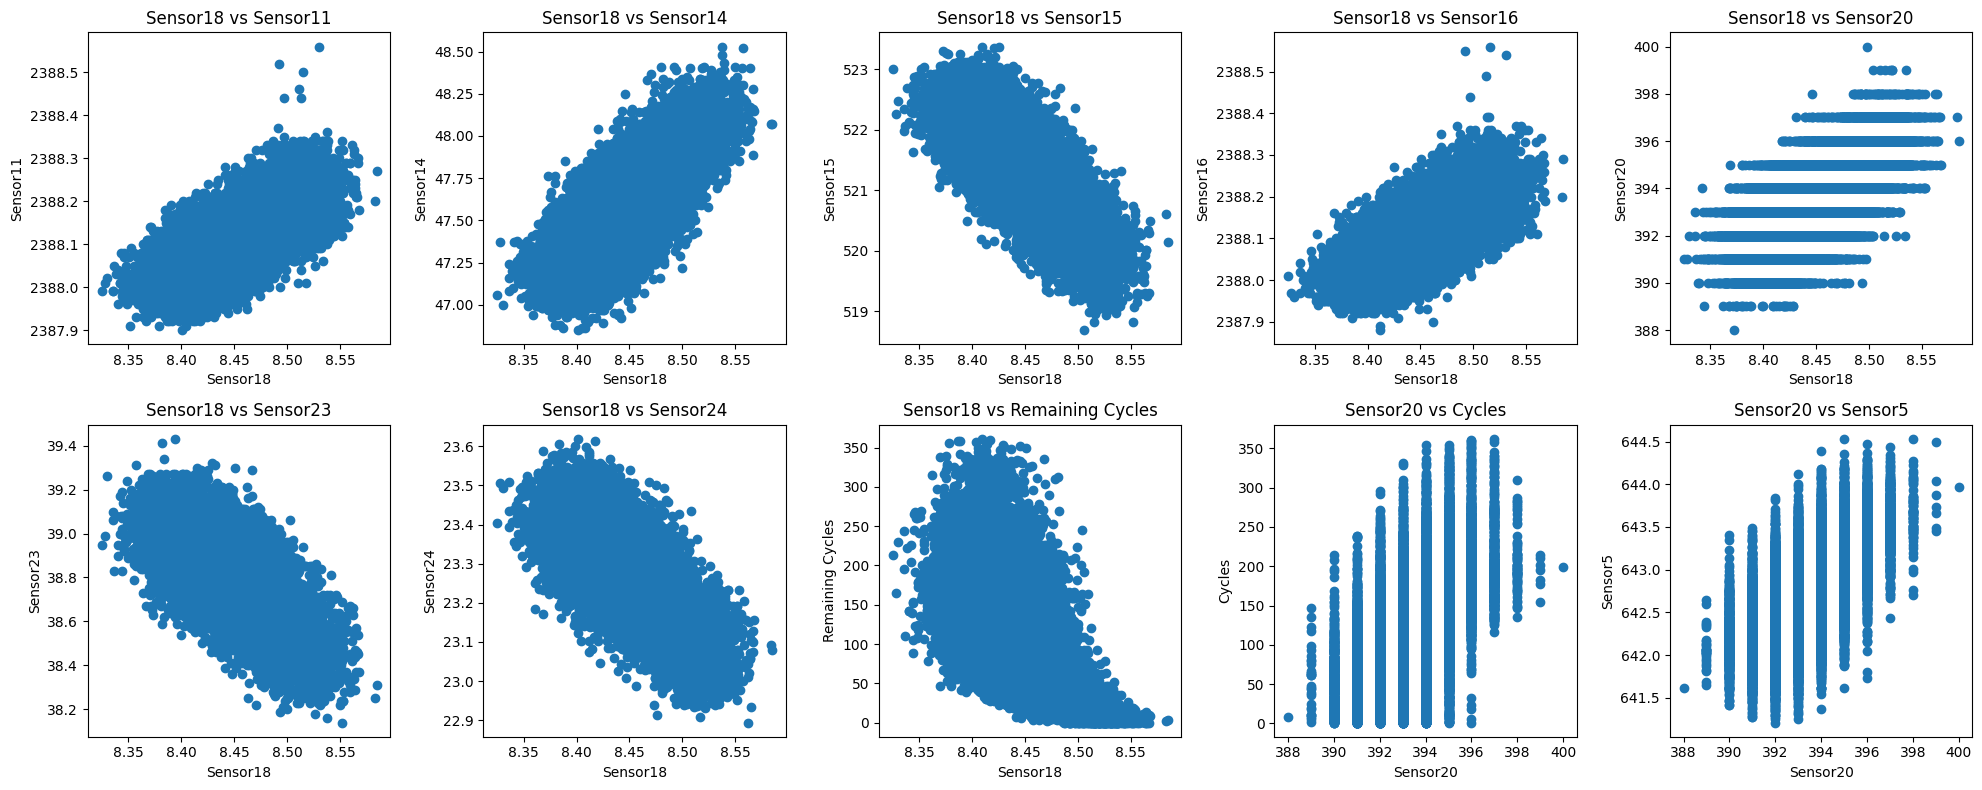

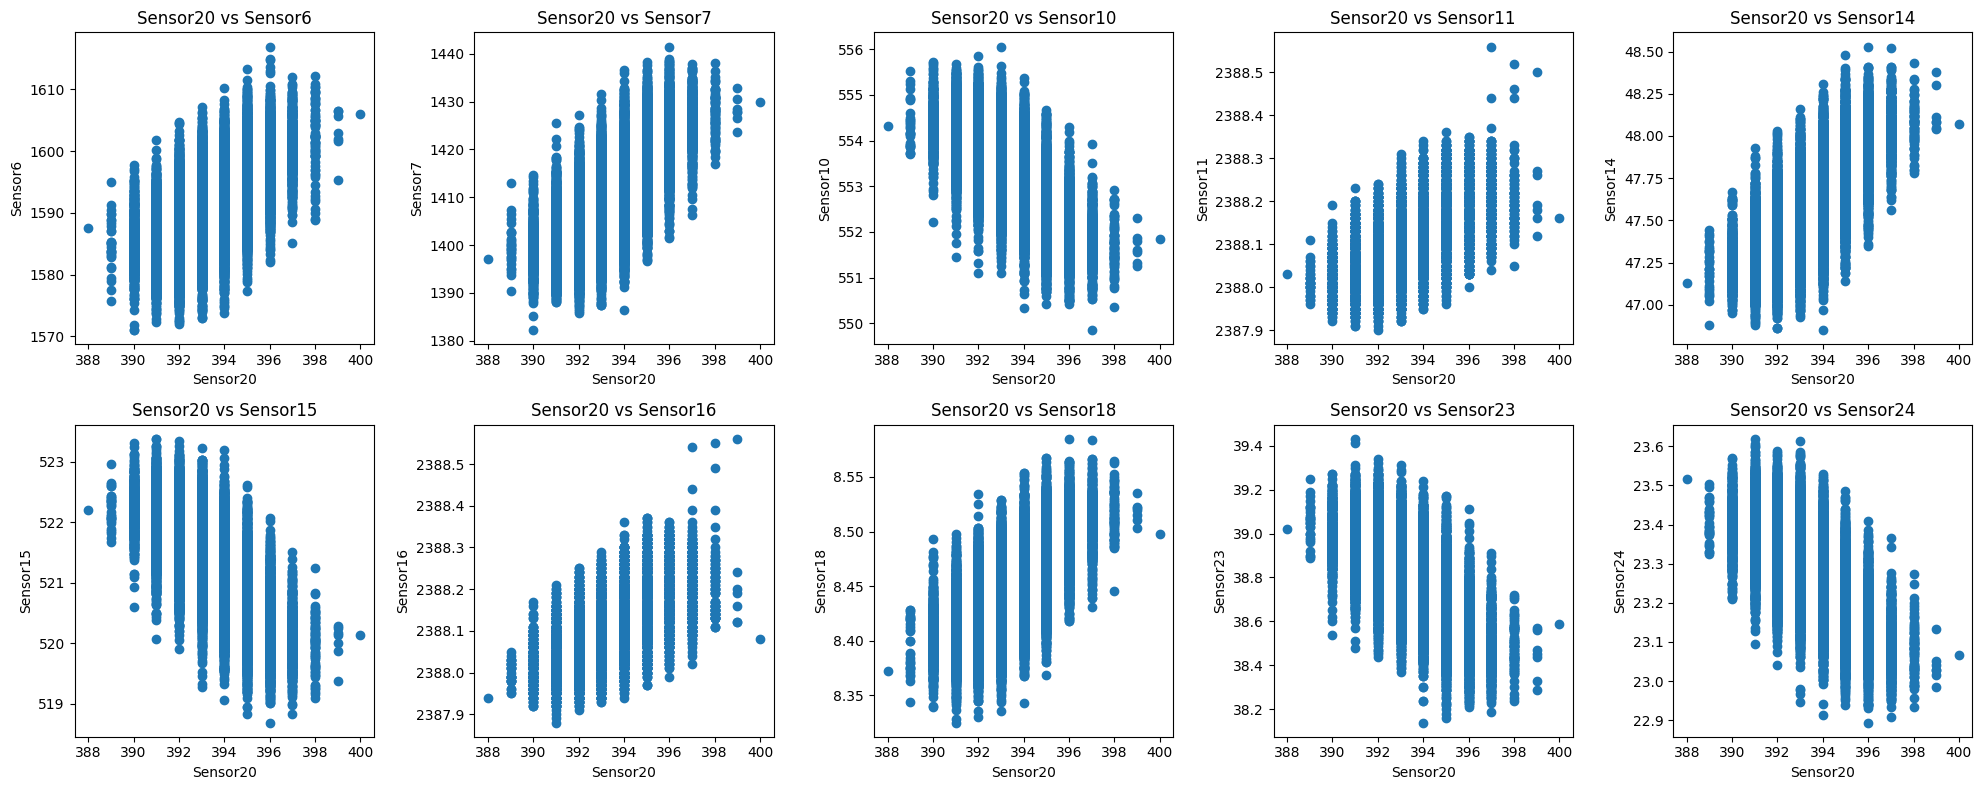

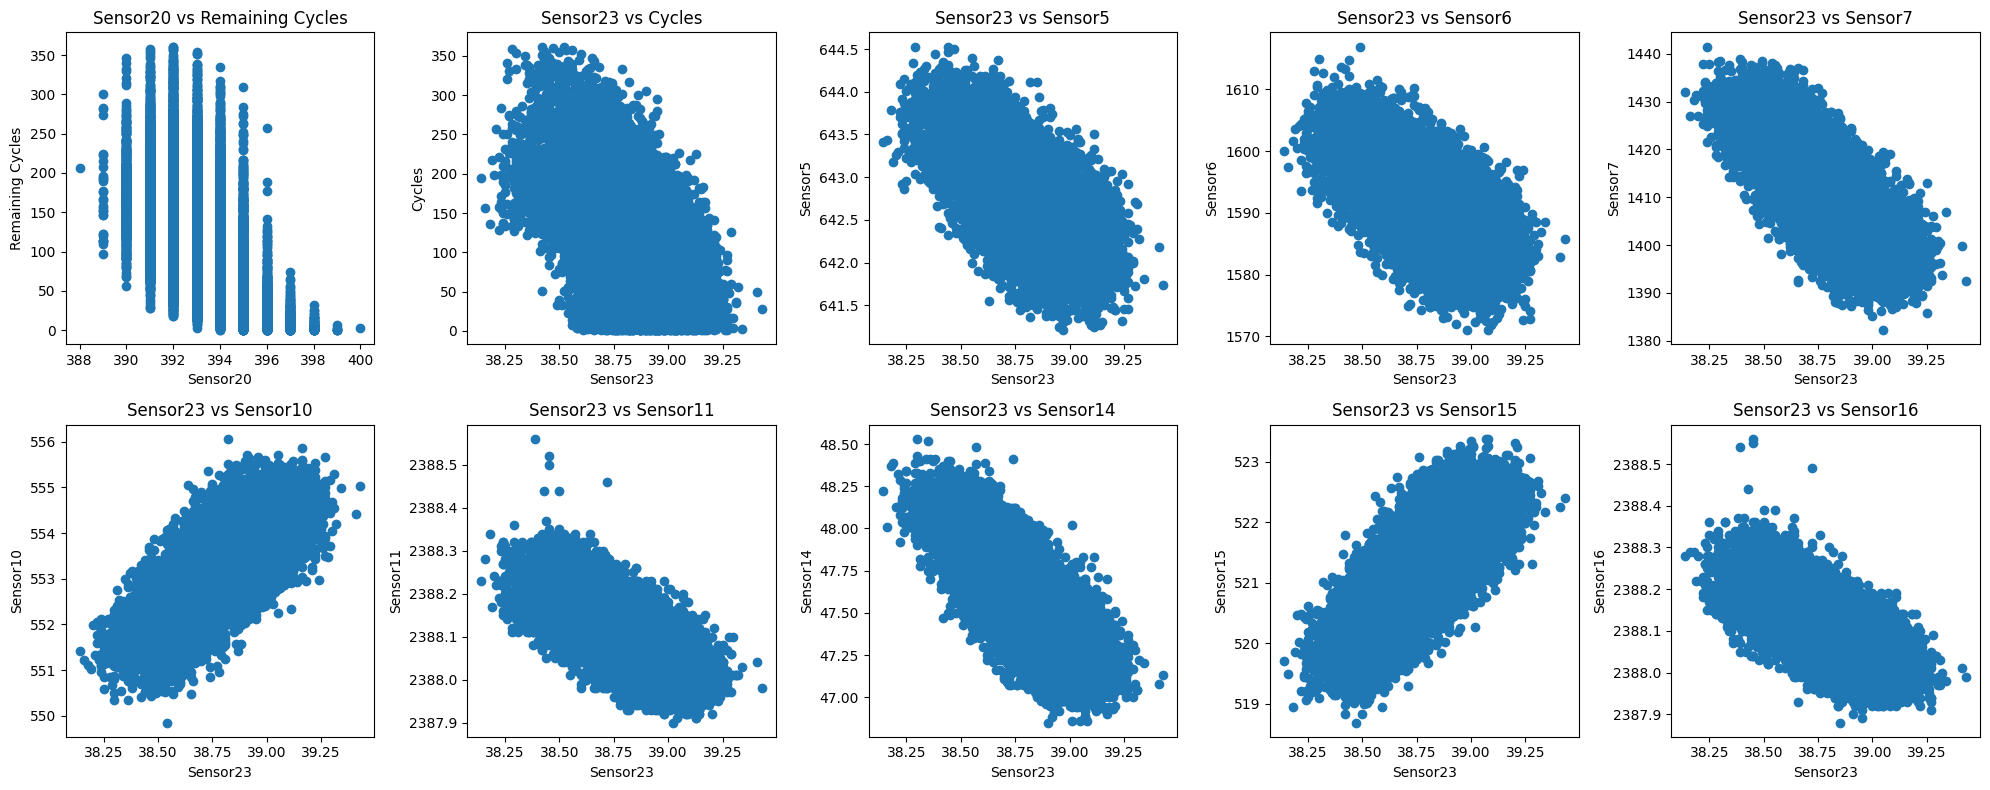

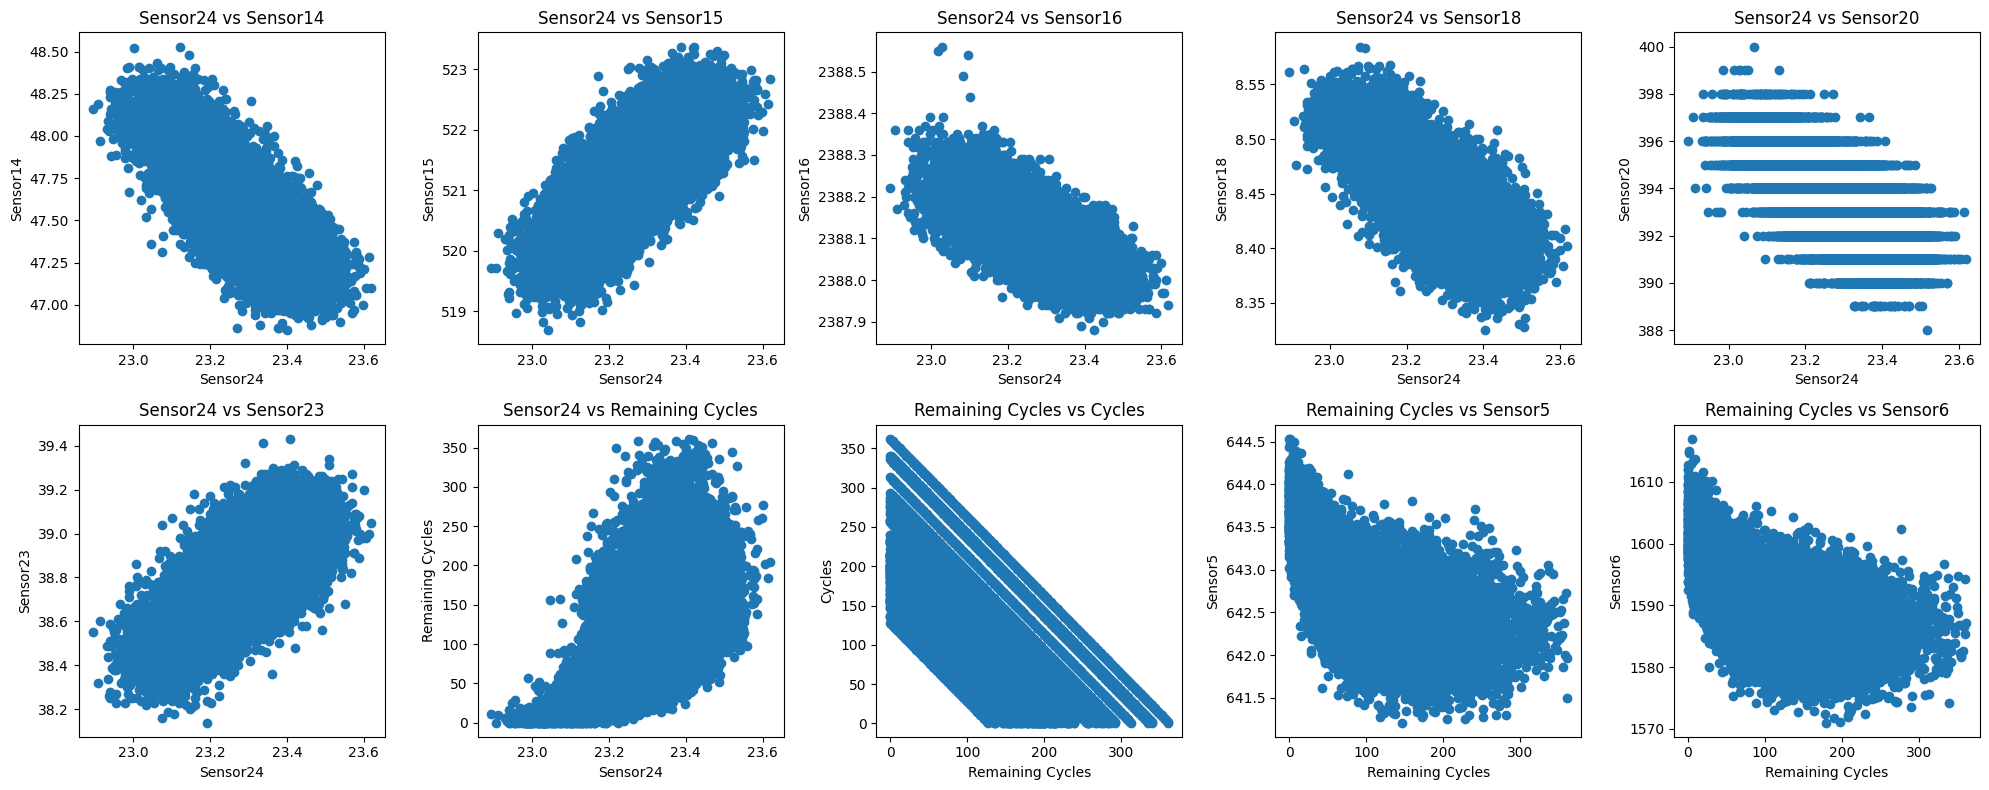

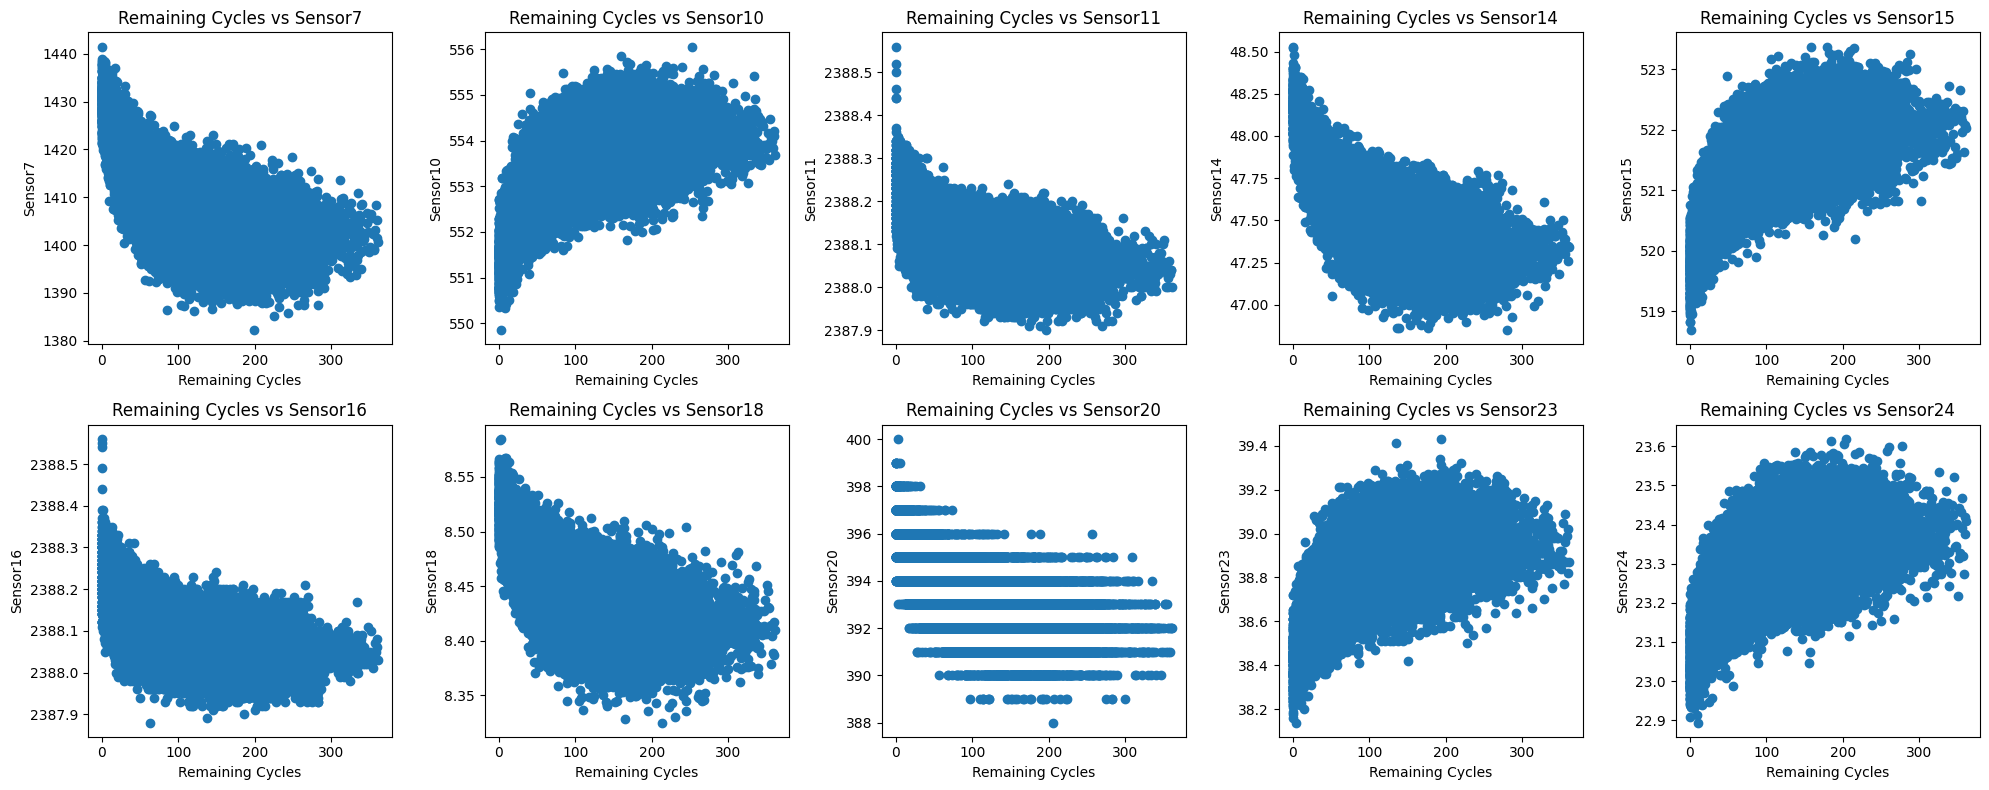

In [27]:
# Scatter plots for bivariate analysis based on Correlation Marrix Value.

corr_matrix = data.corr()
threshold = 0.5
sensors = data.columns

# Number of pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = pairs

for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()

    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)

    plt.tight_layout()  
    plt.show()